<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKursCdV/blob/main/03_01_Handgestricktes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ein handgestricktes künstliches neuronales Netz**



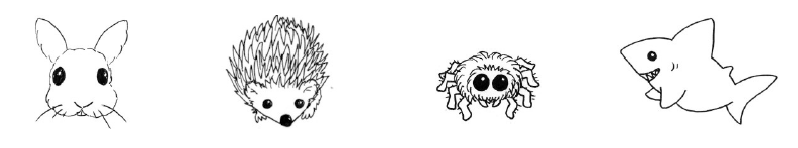

### **Häschen, Igel, Vogelspinne oder Hai?**

Bevor wir in die Entwicklung von Machine Learning Anwendungen mit Keras einsteigen, schauen wir uns ein in reinem Python handgestricktes Beispiel an, das demonstrieren soll, wie ein fertig trainiertes neuronales Netz arbeiten. 

Es geht in dem Beispiel darum, anhand zweier Parameter `flauschigkeit` und `niedlichkeit` zwischen vier Tierarten zu unterscheiden: Häschen, Igel, Vogelspinnen und Haie

1.   Häschen -> flauschig und niedlich

2.   Igel -> nicht flauschig und niedlich

3.   Vogelspinne -> flauschig und nicht niedlich

4.   Hai -> nicht niedlich und nicht flauschig



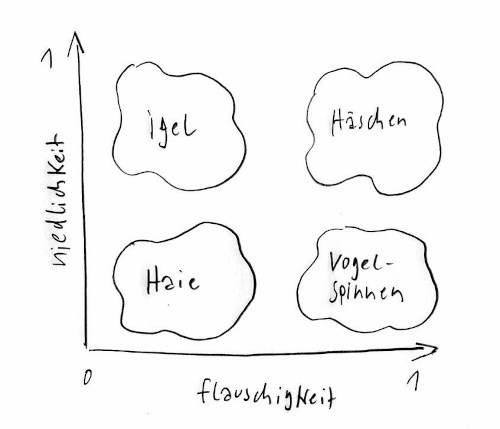

Wir möchten eine Funktion

`species_erkennen(flauschigkeit, niedlichkeit)`

haben, die uns eine Liste mit vier Zahlen zwischen 0 und 1 ausgibt:

`[1, 0, 0, 0]` -> ist auf jeden Fall ein Häschen

`[0, 1, 0, 0]` -> ist auf jeden Fall ein Igel

`[0, 0.4, 0.6, 0]` -> ist wahrscheinlich eine Vogelspinne

...

Die Funktion soll nach dem Prinzip eines Künstlichen Neuronalen Netzes arbeiten.

Die Summe dieser Liste soll immer 1 sein. (Begründung: Im wissenschaftlichen Rechnen werden Wahrscheinlichkeiten meist mit einer Zahl zwischen 0 und 1 ausgedrückt. Insofern ist es sinnvoll, wenn bei einer Verteilung von Wahrscheinlichkeiten auf mehrere Möglichkeiten die Summe 1 ist.)

### **Aktivierungsfunktionen**

Wir benötigen zwei Aktivierungsfunktionen:

Die Funktion `relu()` (steht für rectified linear unit, aber egal!) setzt Eingangswerte unterhalb 0 auf 0. Werte oberhalb 0 werden unverändert durchgereicht:

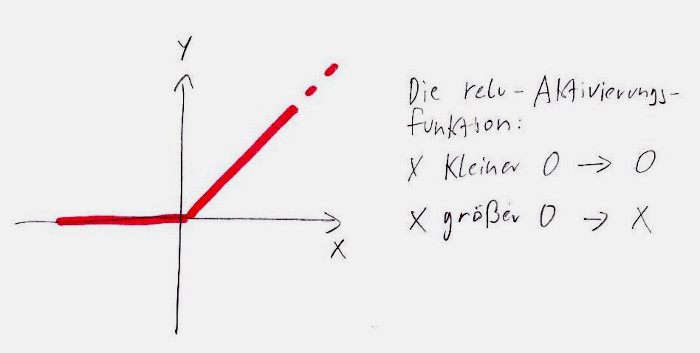

In [ ]:
def relu(x):
  return max(0, x)

print(relu(-1000))
print(relu(0))
print(relu(23.23))

Die Funktion `softmax()` wird dafür sorgen, dass die Summe der Wahrscheinlichkeiten in der Funktion `species_erkennen()` gleich 0 ist:

In [ ]:
def softmax(list_):
  min_ = min(list_)
  max_ = max(list_)
  sum_ = sum(list_)
  if sum_ != 0:
    list_ = [elem / sum_ for elem in list_]
  else:
    val = 1.0 / len(list_)
    list_ = [val] * len(list_)
  return list_

print(softmax([0, 1]))
print(softmax([0, 10]))
print(softmax([1, 2]))


### **Das Häschen-Neuron**

Wir gehen schrittweise vor und definieren zunächst für jede Species eine Funktion, die ein einzelnes Neuron mit zwei Eingängen darstellt:

`w1` und `w2` sind **Gewichte**.

`b` wird im englischen als **Bias** bezeichnet - deutsche Übersetzungen wie "Vorspannung" oder "Verzerrung" sind unüblich, wir bleiben bei dem englischen Begriff.

Ein Neuron in einem künstlichen Neuronalen Netzwerk arbeitet grundsätzlich so, dass es jeden eingehenden Wert (ob aus einer direkten Eingabe oder einem vorgeschalteten Neuron) mit einem zugeordneten Gewicht multipliziert. Anschliessend werden die Ergebnisse summiert und ein Bias addiert:

Eingabe 1 * Gewicht 1 + Eingabe 2 * Gewicht 2 + ... + Bias (siehe unten Zeile 5!)

Anschliessend wird der Wert durch eine Aktivierungsfunktion geschicht, hier: `relu()`


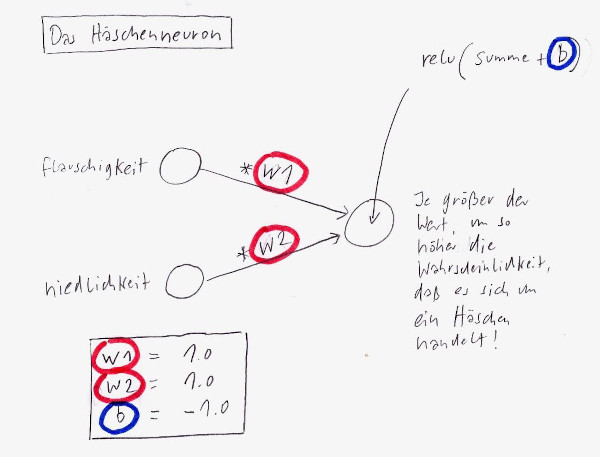

In [ ]:
def ist_haeschen(flauschigkeit, niedlichkeit):
  w1 = 1.0
  w2 = 1.0
  b = -1.0
  result = flauschigkeit * w1 + niedlichkeit * w2 + b
  result = relu(result)
  return result

Probiere unterschiedliche Werte (zwischen 0 und 1) für `flauschigkeit` und `niedlichkeit` aus:

In [ ]:
ist_haeschen(1, 1)

Es folgt die Definition aller vier Funktionen - die Werte für w1, w2 und b haben wir durch rumprobieren gefunden:

In [ ]:
def ist_haeschen(flauschigkeit, niedlichkeit):
  w1 = 1.0
  w2 = 1.0
  b = -1.0
  result = flauschigkeit * w1 + niedlichkeit * w2 + b
  result = relu(result)
  return result

def ist_igel(flauschigkeit, niedlichkeit):
  w1 = -1.0
  w2 = 1.0
  b = 0
  result = flauschigkeit * w1 + niedlichkeit * w2 + b
  result = relu(result)
  return result

def ist_vogelspinne(flauschigkeit, niedlichkeit):
  w1 = 1.0
  w2 = -1.0
  b = 0
  result = flauschigkeit * w1 + niedlichkeit * w2 + b
  result = relu(result)
  return result

def ist_hai(flauschigkeit, niedlichkeit):
  w1 = -1.0
  w2 = -1.0
  b = 1.0
  result = flauschigkeit * w1 + niedlichkeit * w2 + b
  result = relu(result)
  return result

Eine kurze Probe, ob alles korrekt arbeitet - sieht gut aus!

In [ ]:
f = 1; n = 1
print("f = 1; n = 1")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

f = 1; n = 0
print("f = 1; n = 0")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

f = 0; n = 1
print("f = 0; n = 1")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

f = 0; n = 0
print("f = 0; n = 0")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

f = 0.25; n = 0.75
print("f = 0.25; n = 0.75")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

f = 0.8; n = 0.3
print("f = 0.8; n = 0.3")
print("haeschen:", ist_haeschen(f, n))
print("igel:", ist_igel(f, n))
print("vogelspinne:", ist_vogelspinne(f, n))
print("hai:", ist_hai(f, n), "\n")

### **Das gesamte Netz: Die Funktion species_erkennen()**

Es fehlt noch die Funktion `species_erkennen()`:

In [ ]:
def species_erkennen(flauschigkeit, niedlichkeit):
  haeschen = ist_haeschen(flauschigkeit, niedlichkeit)
  igel = ist_igel(flauschigkeit, niedlichkeit)
  vogelspinne = ist_vogelspinne(flauschigkeit, niedlichkeit)
  hai = ist_hai(flauschigkeit, niedlichkeit)
  result = [haeschen, igel, vogelspinne, hai]
  result = softmax(result)
  return result

Noch einmal der Test:

In [ ]:
f = 1; n = 1
print("f = 1; n = 1")
print(species_erkennen(f, n), "\n")

f = 1; n = 0
print("f = 1; n = 0")
print(species_erkennen(f, n), "\n")

f = 0; n = 1
print("f = 0; n = 1")
print(species_erkennen(f, n), "\n")

f = 0; n = 0
print("f = 0; n = 0")
print(species_erkennen(f, n), "\n")

f = 0.25; n = 0.75
print("f = 0.25; n = 0.75")
print(species_erkennen(f, n), "\n")

f = 0.8; n = 0.3
print("f = 0.8; n = 0.3")
print(species_erkennen(f, n), "\n")

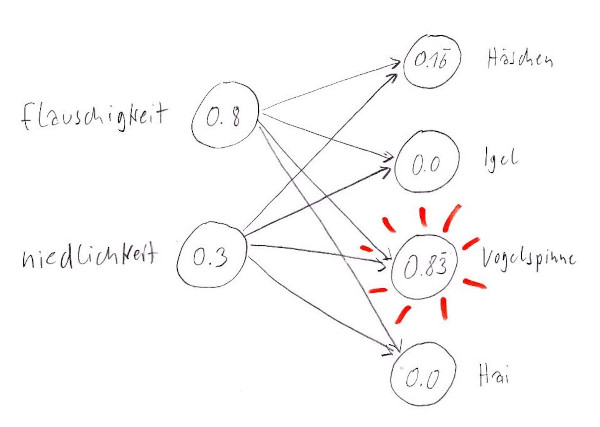

Wir haben im gegebene Beispiel die Werte für Gewichte und Bias von Hand eingegeben.

**Maschinelles Lernen bedeutet in diesem Zusammenhang: die Werte in einem algorithmischen Verfahren zu finden.**

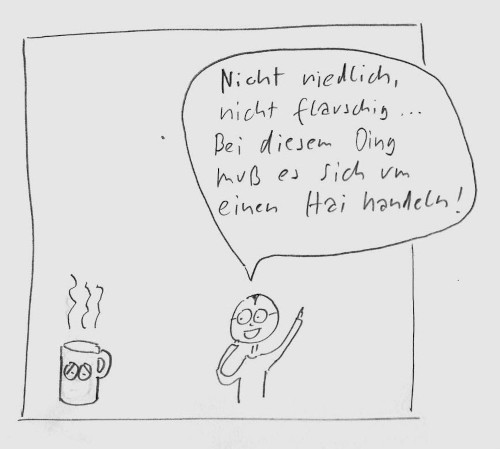